In [36]:
import matplotlib.pylab as plt
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import numpy as np
# f = np.load("./model_maxtime_combine_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
name_DSNB_file = "/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_time_jobs_DSNB_sk_data/predict_0.npz"
f = np.load( name_DSNB_file, allow_pickle=True)
predict_proba = f["predict_proba"][:,1]
equen = f["equen"]
vertex = f["vertex"]
labels = f["labels"]
pdgs = f["pdg_bkg"]
# print("predict_proba: ", predict_proba)
# print("labels: ", labels)
# print("pdg:  ", pdgs)

# seperate sig and bkg
dir_proba ={}
dir_vertex = {}
dir_equen = {}
dir_proba["sig"] = predict_proba[labels==1]
dir_proba["bkg"] = predict_proba[labels==0]
dir_vertex["sig"] = np.array(vertex[labels==1])
dir_vertex["bkg"] = np.array(vertex[labels==0])
dir_equen["sig"] = np.array(equen[labels==1])
dir_equen["bkg"] = np.array(equen[labels==0])

Text(0.5, 1.0, 'AtmCC Background Spectrum')

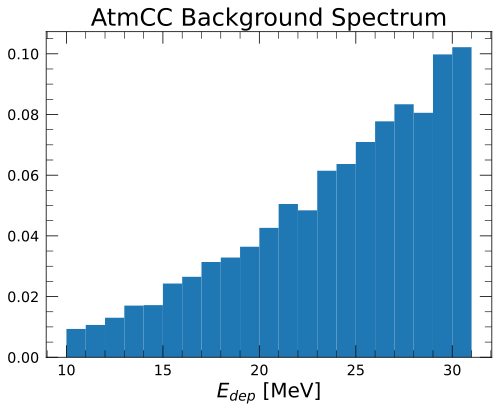

In [10]:
import uproot as up
f_CC = up.open("./energy_spectrum/zhangyy/h_CC.root")
h_CC, edge_CC = f_CC["CC"].to_numpy()
center_CC = 0.5 * (edge_CC[:-1]+edge_CC[1:])
# plt.step(edge_CC[:-1], h_CC)
uplimit_equen = 31
downlimit_equen = 10

# Cut the energy spectrum
index_cut_CC = (center_CC>downlimit_equen) & (center_CC<uplimit_equen)
h_CC_cut = h_CC[index_cut_CC]/np.sum(h_CC[index_cut_CC])
center_CC_cut = center_CC[index_cut_CC]
bin_width_CC_cut = np.diff(edge_CC)[index_cut_CC]
plt.bar(center_CC_cut, h_CC_cut, align="center", width=bin_width_CC_cut)
plt.xlabel("$E_{dep} $ [MeV]")
plt.title("AtmCC Background Spectrum")

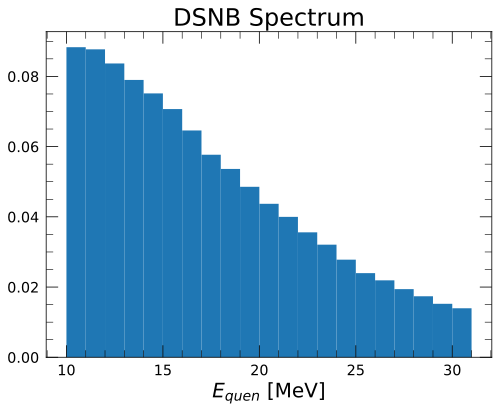

In [11]:
v_hist_DSNB = plt.hist(dir_equen["sig"], bins=edge_CC[(edge_CC<=uplimit_equen) &\
                                (edge_CC>=downlimit_equen)], density=True)
h_DSNB, edge_DSNB = v_hist_DSNB[0], v_hist_DSNB[1]
plt.xlabel("$E_{quen}$ [MeV]")
plt.title(("DSNB Spectrum"))
center_DSNB = 0.5*(edge_DSNB[:-1]+edge_DSNB[1:])

In [26]:
import random

CC_samples = {"equen":np.array([]), "prod":np.array([]), "vertex":np.array([[0, 0, 0]])}
v_reweight_ratio = [h_CC_cut[i]/h_DSNB[i] if h_DSNB[i]!=0 else 0 for i in range(len(h_DSNB))]
scale_factor_evts = np.max(v_reweight_ratio) #because sometimes the pdf of CC is greater than pdf. of CC_samples
                                                #which will cause the number of selected events is out of range of existing samples.

for i in range(len(bin_width_CC_cut)):
    index_DSNB_Ecut = (dir_equen["sig"]<center_CC_cut[i]+bin_width_CC_cut[i]*0.5) &\
                      (dir_equen["sig"]>center_CC_cut[i]-bin_width_CC_cut[i]*0.5)
    equen_DSNB_Ecut = dir_equen["sig"][index_DSNB_Ecut]
    prod_DSNB_Ecut = dir_proba["sig"][index_DSNB_Ecut]
    vertex_DSNB_Ecut = dir_vertex["sig"][index_DSNB_Ecut]
    #### Check result #######
    # print(h_DSNB)
    # print(h_CC_cut)
    # print((center_DSNB))
    # print(center_CC_cut)
    # print(len(equen_DSNB_Ecut))
    ##########################
    n_evts_need_selected_DSNB = round(len(equen_DSNB_Ecut)*v_reweight_ratio[i]/scale_factor_evts)
    # print(len(equen_DSNB_Ecut), n_evts_need_selected_DSNB)
    index_select_DSNB = random.sample(range(0, len(equen_DSNB_Ecut)), n_evts_need_selected_DSNB)
    CC_samples["equen"] = np.concatenate((CC_samples["equen"], equen_DSNB_Ecut[index_select_DSNB]))
    CC_samples["prod"]  = np.concatenate((CC_samples["prod"], prod_DSNB_Ecut[index_select_DSNB] ))
    CC_samples["vertex"] = np.concatenate((CC_samples["vertex"], vertex_DSNB_Ecut[index_select_DSNB]))
CC_samples["vertex"] = CC_samples["vertex"][1:] #in order to concatenate the array from 2d array, we initialize
                                                #the first index as [0, 0, 0], so after concatenating we need to
                                                #remove it
print("CC_samples:\t",CC_samples )
print("Check CC_smaples:")
for key in CC_samples.keys():
    print("\t\t"+key+":\t", len(CC_samples[key]))



CC_samples:	 {'equen': array([10.79585174, 10.68106178, 10.28935612, ..., 30.14731053,
       30.69858401, 30.95230474]), 'prod': array([0.98949177, 0.99801843, 0.92428142, ..., 0.99744075, 0.99612922,
       0.99976056]), 'vertex': array([[   295.67025368,  -5391.9153296 ,   1242.07841621],
       [-10321.37253482,  -3585.61148977,    415.53795446],
       [ 12540.10821046,  -9357.24690109,  -3194.67397628],
       ...,
       [-10765.34727928,   -411.71961781,   2200.72077056],
       [  1959.6368822 ,  -3641.59387447,  12693.45145944],
       [ -9504.78064847,   8953.27734144,   -904.97703304]])}
Check CC_smaples:
		equen:	 13975
		prod:	 13975
		vertex:	 13975


Text(0.5, 0, 'Signal Prob. ')

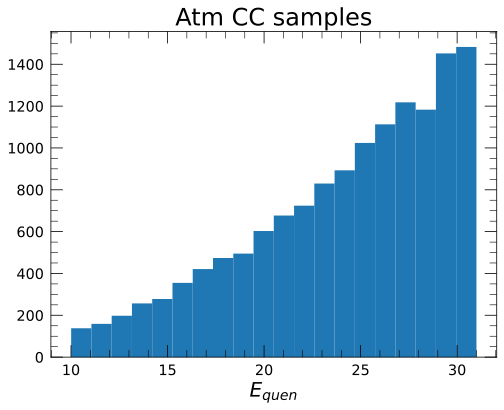

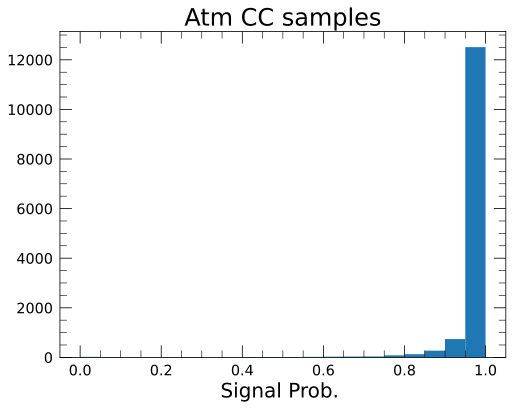

In [33]:
# Check CC_sample
plt.hist(CC_samples["equen"], bins=20)
plt.xlabel("$E_{quen}$")
plt.title("Atm CC samples")
plt.figure()
plt.hist(CC_samples["prod"], bins=20)
plt.title("Atm CC samples")
plt.xlabel("Signal Prob. ")

In [40]:
# Save CC_samples
import os
name_file = os.path.basename(name_DSNB_file)
name_dir = os.path.dirname(name_DSNB_file)
np.savez(name_dir+"/CC_samples"+name_file, CC_samples=CC_samples)

In [41]:
test_load = True
if test_load:
    f = np.load(name_dir+"/CC_samples"+name_file, allow_pickle=True)
    print(f["CC_samples"])


{'equen': array([10.79585174, 10.68106178, 10.28935612, ..., 30.14731053,
       30.69858401, 30.95230474]), 'prod': array([0.98949177, 0.99801843, 0.92428142, ..., 0.99744075, 0.99612922,
       0.99976056]), 'vertex': array([[   295.67025368,  -5391.9153296 ,   1242.07841621],
       [-10321.37253482,  -3585.61148977,    415.53795446],
       [ 12540.10821046,  -9357.24690109,  -3194.67397628],
       ...,
       [-10765.34727928,   -411.71961781,   2200.72077056],
       [  1959.6368822 ,  -3641.59387447,  12693.45145944],
       [ -9504.78064847,   8953.27734144,   -904.97703304]])}


....
